### The Data
### "Palmer Penguins" dataset summary:

### Columns in the dataset
- Species: penguin species (Chinstrap, Adélie, or Gentoo)
- Island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- Sex: penguin sex

### What is culmen?

The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers depending on the standard chosen.

#### Our goal is to create a model that can help a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# description

df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [5]:
#Covariance

df.cov()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [6]:
#correlation

df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


### Number of entries in data for each species

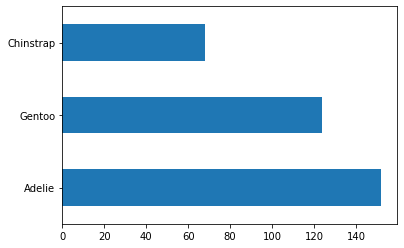

In [7]:
df['species'].value_counts().plot(kind='barh')
plt.show()

It can be observed that, this data contains different number of entries for each species

### Missing Values
Recall the purpose is to create a model for future use, so data points missing crucial information wont help in this task, especially since for future data points we will assume the research will grab the relevant feature information.

In [8]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
# Dropping the rows with null values for all variables

df = df.dropna()

In [10]:
#imputing the null values in sex with its mode

df['sex'] = df['sex'].fillna('MALE')

In [11]:
df.drop(df[df['sex']=='.'].index, inplace=True)
df.shape

(333, 7)

### Distribution of Variables

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

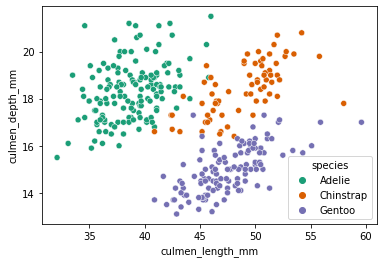

In [12]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

Culmen Length Distribution


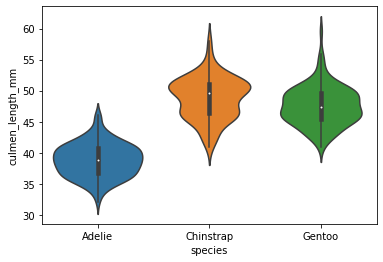

In [13]:
print('Culmen Length Distribution')
sns.violinplot(data=df, x="species", y="culmen_length_mm", size=8)
plt.show()

Culmen Depth Distribution


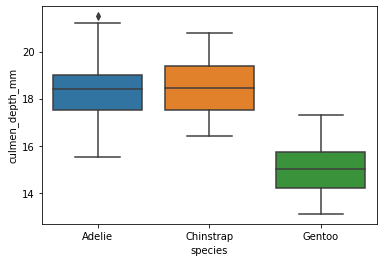

In [14]:
print('Culmen Depth Distribution')
sns.boxplot(data=df, x="species", y="culmen_depth_mm")
plt.show()

Body Mass Distribution


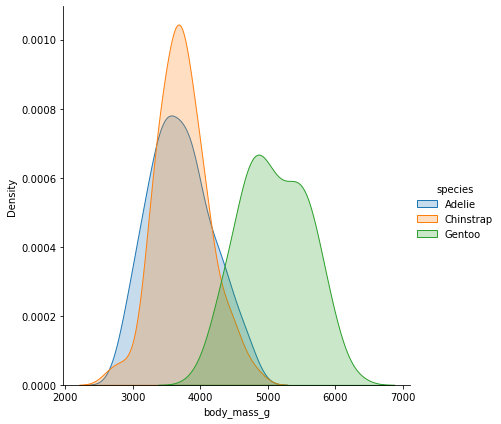

In [15]:
print('Body Mass Distribution')
sns.FacetGrid(df, hue="species", height=6,).map(sns.kdeplot, "body_mass_g",shade=True).add_legend()
plt.show()

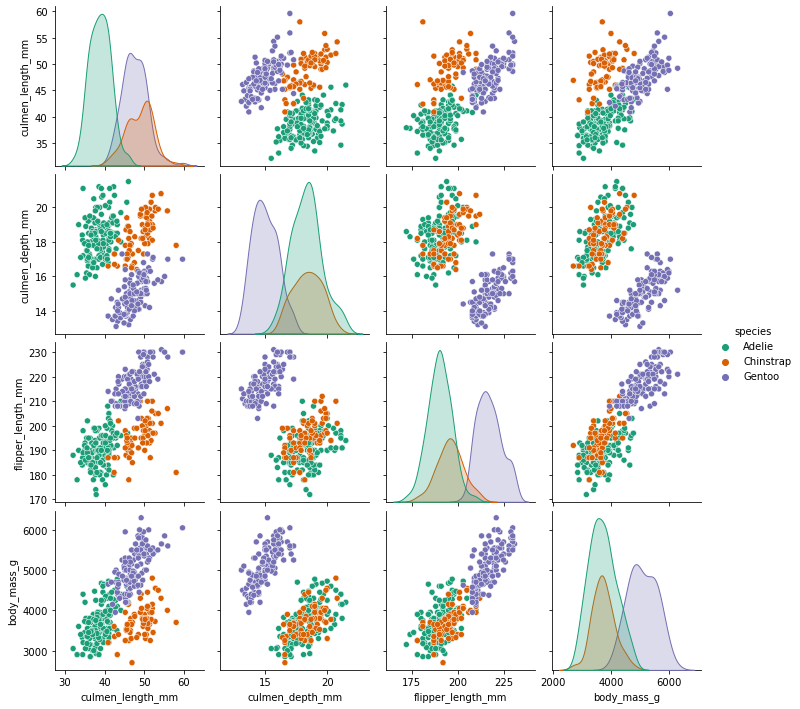

In [16]:
sns.pairplot(df,hue='species',palette='Dark2')

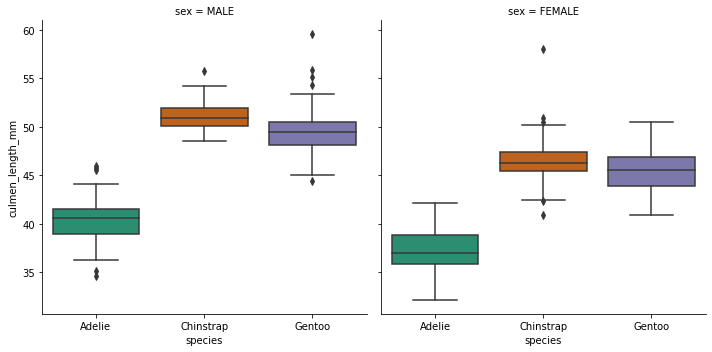

In [17]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

### Feature Engineering

In [18]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [22]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [20]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

### Train | Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Decision Tree Classifier - with default hyperparameters

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
base_pred = model.predict(X_test)

### Evaluation

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [28]:
confusion_matrix(y_test,base_pred)

array([[39,  1,  0],
       [ 3, 24,  0],
       [ 1,  0, 32]], dtype=int64)

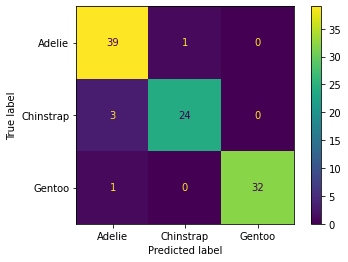

In [29]:
plot_confusion_matrix(model,X_test,y_test)

In [30]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        40
   Chinstrap       0.96      0.89      0.92        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



In [31]:
model.feature_importances_

array([0.34035881, 0.04582245, 0.57575804, 0.        , 0.03806069,
       0.        , 0.        ])

In [32]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.340359
culmen_depth_mm,0.045822
flipper_length_mm,0.575758
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.000000


<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

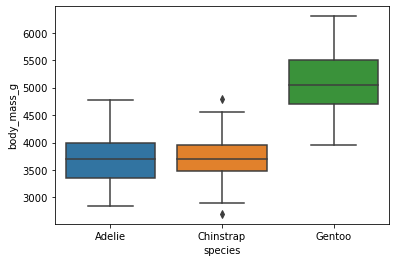

In [34]:
sns.boxplot(x='species',y='body_mass_g',data=df)

### Visualize the Tree

In [35]:
from sklearn.tree import plot_tree

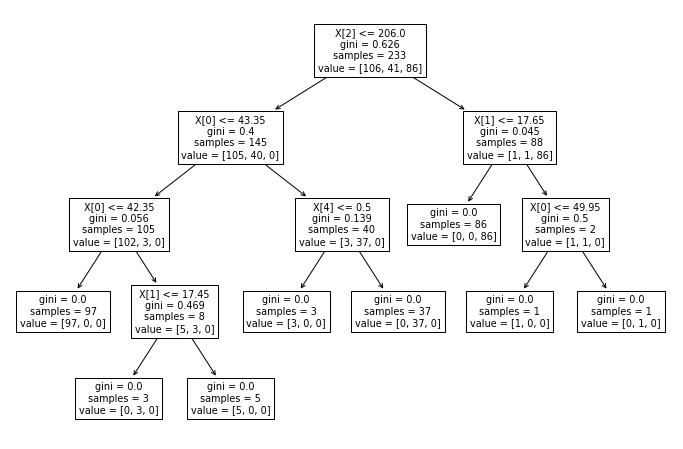

In [36]:
plt.figure(figsize=(12,8))
plot_tree(model)
plt.show()

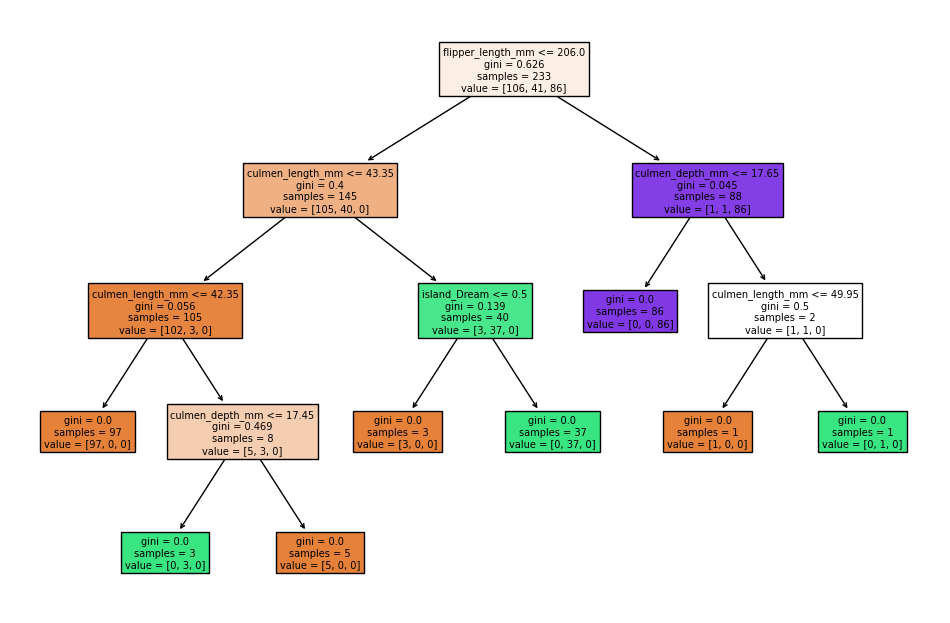

In [38]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model,filled=True,feature_names=X.columns)
plt.show()

### Reporting Model Results
To begin experimenting with hyperparameters,let's create a function that reports back classification results and plots out the tree.

In [39]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True,feature_names=X.columns)

### Understanding Hyperparameters
### Max Depth

In [40]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.87      0.97      0.92        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100





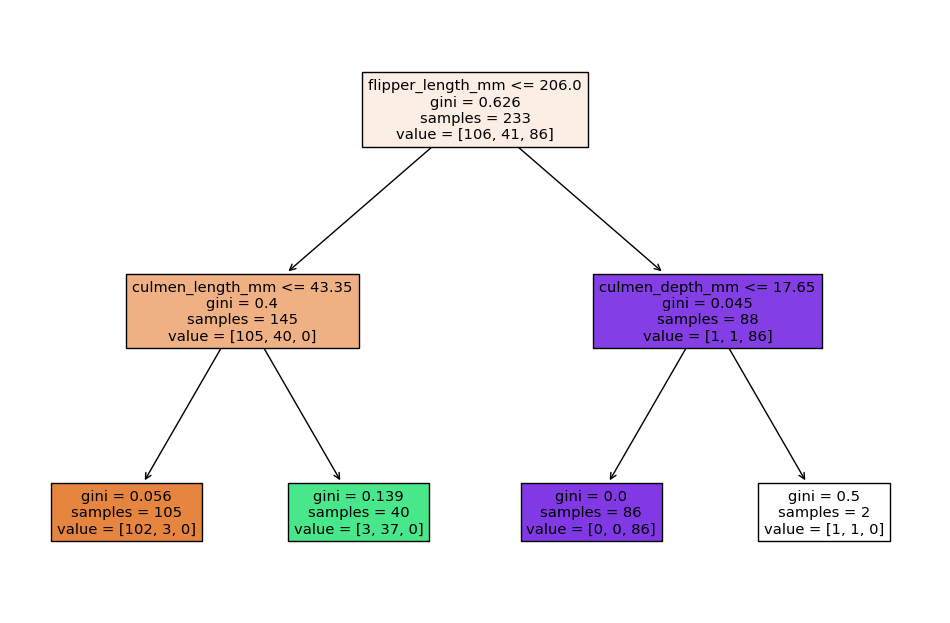

In [41]:
report_model(pruned_tree)